In [41]:
!pip install missingno

In [99]:
import numpy as np
import pandas as pd
import missingno as mn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from sklearn.datasets import load_breast_cancer

In [4]:
breast=load_breast_cancer()

In [5]:
breast_data=breast.data

In [7]:
breast_data.shape

(569, 30)

In [10]:
breast_labels=breast.target

In [12]:
breast_labels.shape

(569,)

In [14]:
labels=np.reshape(breast_labels,(569,1))

In [16]:
df=np.concatenate([breast_data,labels],axis=1)

In [18]:
df

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [22]:
breast_dataset=pd.DataFrame(df)

In [23]:
breast_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [24]:
features=breast.feature_names

In [27]:
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [28]:
#add labels column name missing in the above feastures
features_labels=np.append(features,'label')

In [31]:
#appending the feature column names to the breast_dataset dataframe
breast_dataset.columns=features_labels

In [32]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [33]:
#replacing the os and 1s in the label column with their respective names
breast_dataset['label'].replace(0,'Benign',inplace=True)
breast_dataset['label'].replace(1,'Malignant',inplace=True)

In [34]:
#getting to know the bottom 5 rows of the data
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [38]:
#checking for null values
breast_dataset.isna().any().sum()

0

<AxesSubplot:>

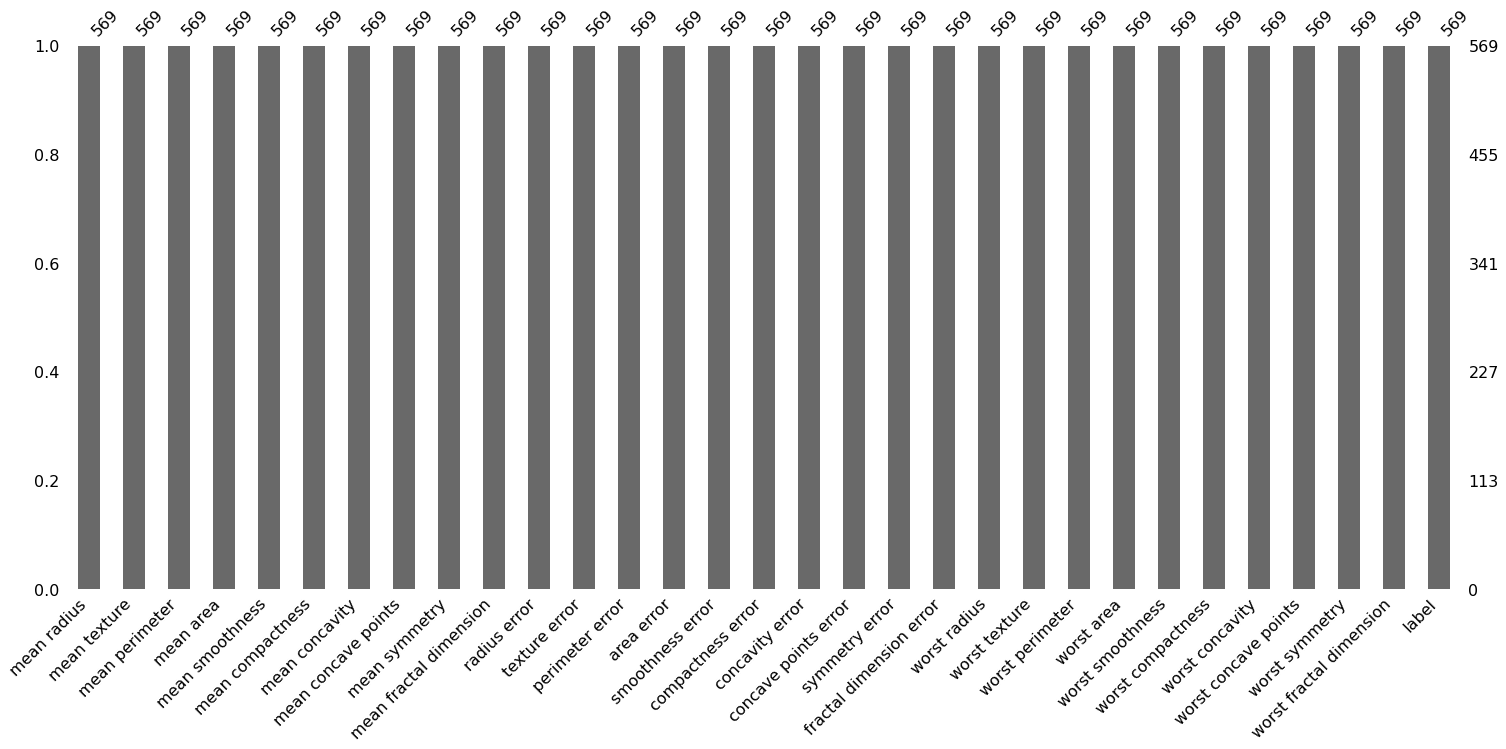

In [43]:
mn.bar(breast_dataset)

In [44]:
(breast_dataset
 .groupby('worst area')
 ['label']
 .describe()
)

,count,unique,top,freq
worst area,,,,
185.2,1,1,Malignant,1
223.6,1,1,Malignant,1
240.1,1,1,Malignant,1
242.2,1,1,Malignant,1
248.0,1,1,Malignant,1
...,...,...,...,...
3143.0,1,1,Benign,1
3216.0,1,1,Benign,1
3234.0,1,1,Benign,1


In [45]:
breast_dataset.label.value_counts()

Malignant    357
Benign       212
Name: label, dtype: int64

<AxesSubplot:>

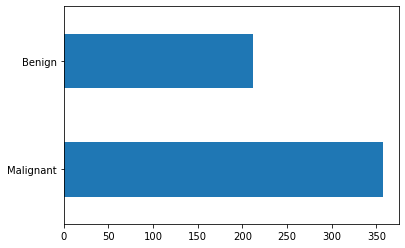

In [48]:
breast_dataset.label.value_counts().plot(kind='barh')

In [50]:
breast_dataset.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [61]:
#data visualization using PCA
#PCA turns high dimensional data into low principal component analysis
x=breast_dataset.loc[:,features].values
x=StandardScaler().fit_transform(x)

In [62]:
x.shape

(569, 30)

In [64]:
#checking whether the normalized data has a mean of 0 and std of 1
np.mean(x),np.std(x)

(-6.826538293184326e-17, 1.0)

In [65]:
#converting normalized features into table with the help of dataframe
feat_cols=['feature'+str(i)for i in range(x.shape[1])]
normalized_breast=pd.DataFrame(x,columns=feat_cols)
normalized_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [69]:
#using PCA to project the 30 variable data into 2 dimensional dataset
pca_breast=PCA(n_components=2)
principalComponents_breast=pca_breast.fit_transform(x)

In [71]:
principle_breast_dataset=pd.DataFrame(data=principalComponents_breast,columns=['Principal component 1','principal component 2'])

In [73]:
principle_breast_dataset.head()

,Principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [76]:
#finding the explained variance ratio
print('Explained variance per component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variance per component: [0.44272026 0.18971182]


From the above information we can see that principal component 1 holds 44.27 percent of the information while principal component 2 holds 18.97 of the information

Its also worth noting that 36.8% of the information was lost during the transformation 

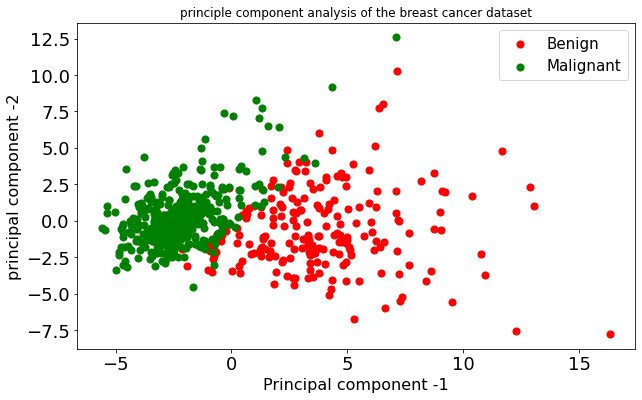

In [83]:
#visualizing the 2 principal components 
plt.figure(figsize=(10,6))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Principal component -1',fontsize=16)
plt.ylabel('principal component -2',fontsize=16)
plt.title('principle component analysis of the breast cancer dataset')
targets=['Benign','Malignant']
colors=['r','g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principle_breast_dataset.loc[indicesToKeep, 'Principal component 1']
               , principle_breast_dataset.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

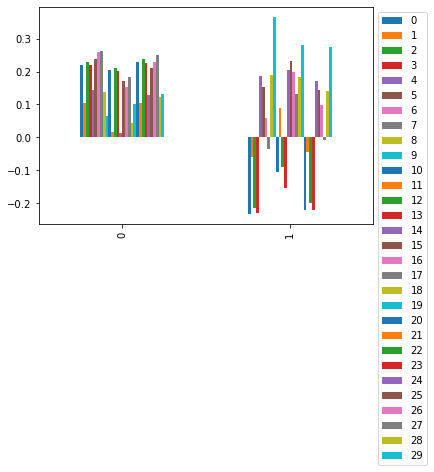

In [97]:
(pd.DataFrame(pca_breast.components_)
 .iloc[:4]
 .plot.bar()
 .legend(bbox_to_anchor=(1,1)))

<AxesSubplot:xlabel='Principal component 1', ylabel='principal component 2'>

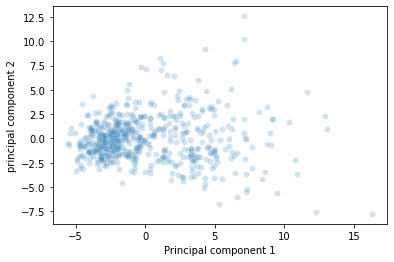

In [106]:
sns.scatterplot(x='Principal component 1',y='principal component 2',data=principle_breast_dataset,alpha=.2)